In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from keras.models import Sequential
from keras.layers import Dense


In [2]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
df = pd.read_csv("/Users/matteoppa/Desktop/fma_metadata/df_to_work1.csv")

In [4]:
column2drop= ["Unnamed: 0"]

In [5]:
df.drop(column2drop, inplace=True, axis=1)

In [6]:
df['liked_bin'] = np.nan
for i in range(0,len(df)):
    if df['liked'][i] == 0 or df['liked'][i] == 1:
        df['liked_bin'][i] = 0  #34 
    else:
        df['liked_bin'][i] = 1 #012

<ipython-input-6-25649067ecc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['liked_bin'][i] = 0  #34
<ipython-input-6-25649067ecc7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['liked_bin'][i] = 1 #012


In [6]:
class_name = 'weekend'

In [7]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=100, stratify=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
test= pd.read_csv("/Users/matteoppa/Desktop/fma_metadata/test_fma.csv")

In [12]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler(random_state=0)

In [14]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# NORMALIZATION

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Keras NN

In [12]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(7, input_dim=n_feature, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
model1 = build_model()

history1 = model1.fit(X_resampled, y_resampled, validation_data=(X_val, y_val), epochs=30, batch_size=10).history

Epoch 1/30
10643/10643 [==============================] - 7s 640us/step - loss: 0.6294 - accuracy: 0.6350 - val_loss: 0.5954 - val_accuracy: 0.5261
Epoch 2/30
10643/10643 [==============================] - 7s 627us/step - loss: 0.5702 - accuracy: 0.6957 - val_loss: 0.5910 - val_accuracy: 0.5235
Epoch 3/30
10643/10643 [==============================] - 7s 630us/step - loss: 0.5664 - accuracy: 0.6961 - val_loss: 0.5973 - val_accuracy: 0.5286
Epoch 4/30
10643/10643 [==============================] - 7s 632us/step - loss: 0.5647 - accuracy: 0.6996 - val_loss: 0.5924 - val_accuracy: 0.5276
Epoch 5/30
10643/10643 [==============================] - 7s 634us/step - loss: 0.5622 - accuracy: 0.7009 - val_loss: 0.5939 - val_accuracy: 0.5320
Epoch 6/30
10643/10643 [==============================] - 7s 696us/step - loss: 0.5613 - accuracy: 0.7005 - val_loss: 0.5740 - val_accuracy: 0.5397
Epoch 7/30
10643/10643 [==============================] - 8s 770us/step - loss: 0.5618 - accuracy: 0.7010 - val_

In [22]:
model2 = build_model()

history2 = model2.fit(X_resampled, y_resampled, validation_data=(X_val, y_val),epochs=30, batch_size=50).history

Epoch 1/30
2129/2129 [==============================] - 2s 807us/step - loss: 0.6530 - accuracy: 0.6076 - val_loss: 0.6194 - val_accuracy: 0.5401
Epoch 2/30
2129/2129 [==============================] - 1s 643us/step - loss: 0.5760 - accuracy: 0.6933 - val_loss: 0.5855 - val_accuracy: 0.5520
Epoch 3/30
2129/2129 [==============================] - 1s 642us/step - loss: 0.5630 - accuracy: 0.6976 - val_loss: 0.5908 - val_accuracy: 0.5541
Epoch 4/30
2129/2129 [==============================] - 1s 650us/step - loss: 0.5548 - accuracy: 0.7039 - val_loss: 0.5774 - val_accuracy: 0.5646
Epoch 5/30
2129/2129 [==============================] - 1s 642us/step - loss: 0.5566 - accuracy: 0.7017 - val_loss: 0.5912 - val_accuracy: 0.5589
Epoch 6/30
2129/2129 [==============================] - 1s 643us/step - loss: 0.5530 - accuracy: 0.7023 - val_loss: 0.5793 - val_accuracy: 0.5643
Epoch 7/30
2129/2129 [==============================] - 1s 648us/step - loss: 0.5521 - accuracy: 0.7043 - val_loss: 0.5793 -

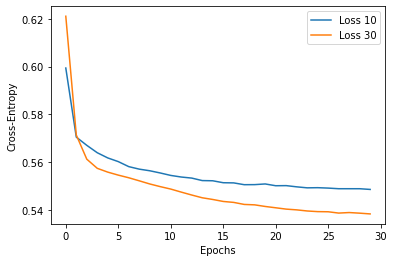

In [23]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 30')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [24]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

495/495 [==============================] - 0s 442us/step - loss: 0.5845 - accuracy: 0.5703
Loss 0.585307, Accuracy 0.546695
Loss 0.584485, Accuracy 0.570264


In [25]:
y_pred = model2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8389359282193858
F1-score [0.91241453 0.        ]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     13277
         1.0       0.00      0.00      0.00      2549

    accuracy                           0.84     15826
   macro avg       0.42      0.50      0.46     15826
weighted avg       0.70      0.84      0.77     15826

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
import pydot
from keras.utils import plot_model

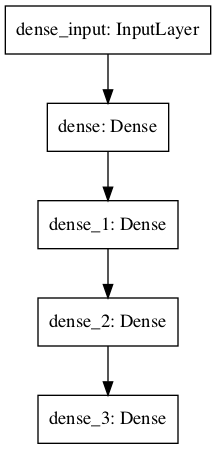

In [27]:
plot_model(model1)

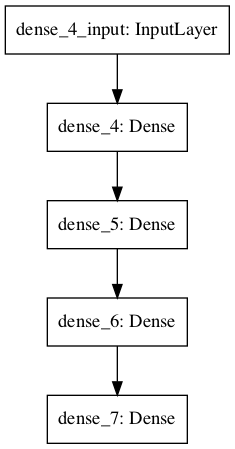

In [21]:
plot_model(model2)

In [14]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10).history

Epoch 1/100
6331/6331 [==============================] - 5s 722us/step - loss: 0.5202 - accuracy: 0.8181 - val_loss: 0.4211 - val_accuracy: 0.8403
Epoch 2/100
6331/6331 [==============================] - 4s 690us/step - loss: 0.4169 - accuracy: 0.8400 - val_loss: 0.4079 - val_accuracy: 0.8396
Epoch 3/100
6331/6331 [==============================] - 4s 689us/step - loss: 0.4071 - accuracy: 0.8368 - val_loss: 0.3953 - val_accuracy: 0.8397
Epoch 4/100
6331/6331 [==============================] - 4s 696us/step - loss: 0.3907 - accuracy: 0.8419 - val_loss: 0.3883 - val_accuracy: 0.8416
Epoch 5/100
6331/6331 [==============================] - 4s 692us/step - loss: 0.3861 - accuracy: 0.8421 - val_loss: 0.3845 - val_accuracy: 0.8417
Epoch 6/100
6331/6331 [==============================] - 5s 857us/step - loss: 0.3828 - accuracy: 0.8423 - val_loss: 0.3814 - val_accuracy: 0.8445
Epoch 7/100
6331/6331 [==============================] - 4s 704us/step - loss: 0.3828 - accuracy: 0.8425 - val_loss: 0

In [29]:
print('Train: Loss %f, Accuracy %f' % (history1['loss'][29], history1['accuracy'][29]))
print('Val: Loss %f, Accuracy %f' % (history1['val_loss'][29], history1['val_accuracy'][29]))

Train: Loss 0.548486, Accuracy 0.710657
Val: Loss 0.586419, Accuracy 0.541809


In [30]:
print('Train: Loss %f, Accuracy %f' % (history2['loss'][29], history2['accuracy'][29]))
print('Val: Loss %f, Accuracy %f' % (history2['val_loss'][29], history2['val_accuracy'][29]))

Train: Loss 0.538220, Accuracy 0.712903
Val: Loss 0.587735, Accuracy 0.566915


In [20]:
print('Train: Loss %f, Accuracy %f' % (history3['loss'][97], history3['accuracy'][99]))
print('Val: Loss %f, Accuracy %f' % (history3['val_loss'][97], history3['val_accuracy'][99]))

Train: Loss 0.351555, Accuracy 0.854180
Val: Loss 0.352442, Accuracy 0.856018


495/495 [==============================] - 0s 450us/step - loss: 0.3667 - accuracy: 0.8484
Loss 0.370621, Accuracy 0.845950
Loss 0.369047, Accuracy 0.840200
Loss 0.366687, Accuracy 0.848414


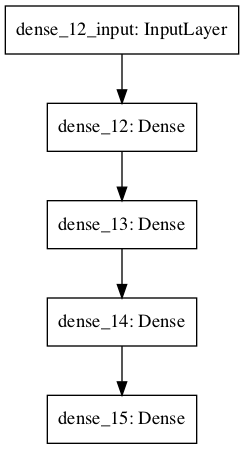

In [28]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
plot_model(model3)

In [32]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

495/495 [==============================] - 0s 481us/step - loss: 0.5590 - accuracy: 0.5801


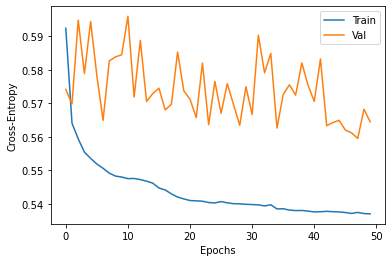

In [33]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()